# Group 6 Project

## Data Cleaning and Manipulation

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mp
from sklearn.linear_model import LogisticRegression, LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
pd.set_option('display.max_columns', None)

In [46]:
#census=pd.read_csv("data_inc.csv")
census=pd.read_csv(r"D:\Study\Sem 2\Programming for Data Science\Project\cleaned_censusoriginal.csv")
census.head(5)

AAGE                          ACLSWKR  ADTIND  ADTOCC  \
0    73                  Not in universe       0       0   
1    58   Self-employed-not incorporated       4      34   
2    18                  Not in universe       0       0   
3     9                  Not in universe       0       0   
4    10                  Not in universe       0       0   

                          AHGA  AGI  *(pred)  AHRSPAY            AHSCOL  \
0         High school graduate  NaN        0      NaN   Not in universe   
1   Some college but no degree  NaN        0      NaN   Not in universe   
2                   10th grade  NaN        0      NaN       High school   
3                     Children  NaN        0      NaN   Not in universe   
4                     Children  NaN        0      NaN   Not in universe   

          AMARITL                        AMJIND  \
0         Widowed   Not in universe or children   
1        Divorced                  Construction   
2   Never married   Not in universe or children   
3   Never married   Not in universe or children   
4   Never married   Not in universe or children   

                                 AMJOCC                       ARACE  \
0                       Not in universe                       White   
1   Precision production craft & repair                       White   
2                       Not in universe   Asian or Pacific Islander   
3                       Not in universe                       White   
4                       Not in universe                       White   

      AREORGN     ASEX            AUNMEM           AUNTYPE  \
0   All other   Female   Not in universe   Not in universe   
1   All other     Male   Not in universe   Not in universe   
2   All other   Female   Not in universe   Not in universe   
3   All other   Female   Not in universe   Not in universe   
4   All other   Female   Not in universe   Not in universe   

                     AWKSTAT  CAPGAIN  CAPLOSS  DIVVAL              FEDTAX  \
0         Not in labor force        0        0       0            Nonfiler   
1   Children or Armed Forces        0        0       0   Head of household   
2         Not in labor force        0        0       0            Nonfiler   
3   Children or Armed Forces        0        0       0            Nonfiler   
4   Children or Armed Forces        0        0       0            Nonfiler   

           GRINGREG            GRINST  \
0   Not in universe   Not in universe   
1             South          Arkansas   
2   Not in universe   Not in universe   
3   Not in universe   Not in universe   
4   Not in universe   Not in universe   

                                      HHDFMX                          HHDREL  \
0   Other Rel 18+ ever marr not in subfamily   Other relative of householder   
1                                Householder                     Householder   
2    Child 18+ never marr Not in a subfamily               Child 18 or older   
3      Child <18 never marr not in subfamily    Child under 18 never married   
4      Child <18 never marr not in subfamily    Child under 18 never married   

   MARSUPWT      MIGMTR1       MIGMTR3       MIGMTR4  \
0   1700.09            ?             ?             ?   
1   1053.55   MSA to MSA   Same county   Same county   
2    991.95            ?             ?             ?   
3   1758.14     Nonmover      Nonmover      Nonmover   
4   1069.16     Nonmover      Nonmover      Nonmover   

                             MIGSAME            MIGSUN  NOEMP  \
0   Not in universe under 1 year old                 ?      0   
1                                 No               Yes      1   
2   Not in universe under 1 year old                 ?      0   
3                                Yes   Not in universe      0   
4                                Yes   Not in universe      0   

                  PARENT          FATHER          MOTHER            SELF  \
0        Not in universe   United-States   United-States   United-States   
1      

In [6]:
census.shape

(199523, 44)

In [7]:
census.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AGI', '*(pred)',
       'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN',
       'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL',
       'FEDTAX', 'GRINGREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT',
       'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
       'FATHER', 'MOTHER', 'SELF', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'YEAR', 'INCOME'],
      dtype='object')

In [8]:
for c in census.columns:
    print("---- %s ---" % c)
    print(census[c].value_counts())

---- AAGE ---
34    3489
35    3450
36    3353
31    3351
33    3340
5     3332
4     3318
3     3279
37    3278
38    3277
2     3236
7     3218
30    3203
32    3188
8     3187
6     3171
9     3162
13    3152
39    3144
1     3138
41    3134
10    3134
11    3128
40    3114
14    3068
12    3060
29    3050
28    3013
42    2995
15    2926
      ... 
60    1560
65    1550
62    1531
63    1501
61    1497
67    1496
66    1443
68    1436
71    1418
69    1412
70    1410
73    1354
72    1315
74    1227
75    1065
76    1050
77     979
78     876
79     811
80     799
90     725
81     720
82     615
83     561
84     519
85     423
86     348
87     301
88     241
89     195
Name: AAGE, Length: 91, dtype: int64
---- ACLSWKR ---
 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal 

 Not in universe         183750
 California                1714
 Utah                      1063
 Florida                    849
 North Carolina             812
 ?                          708
 Abroad                     671
 Oklahoma                   626
 Minnesota                  576
 Indiana                    533
 North Dakota               499
 New Mexico                 463
 Michigan                   441
 Alaska                     290
 Kentucky                   244
 Arizona                    243
 New Hampshire              242
 Wyoming                    241
 Colorado                   239
 Oregon                     236
 West Virginia              231
 Georgia                    227
 Montana                    226
 Alabama                    216
 Ohio                       211
 Texas                      209
 Arkansas                   205
 Mississippi                204
 Tennessee                  202
 Pennsylvania               199
 New York                   195
 Louisia

In [47]:
#data_name[‘column_name’].replace(0, np.nan, inplace= True)
new_df=census.drop(columns=['MIGMTR1', 'MIGMTR3', 'MIGMTR4','MIGSUN','*(pred)','AGI', 'AHRSPAY'])

In [38]:
new_df.head(5)

AAGE                          ACLSWKR  ADTIND  ADTOCC  \
0    73                  Not in universe       0       0   
1    58   Self-employed-not incorporated       4      34   
2    18                  Not in universe       0       0   
3     9                  Not in universe       0       0   
4    10                  Not in universe       0       0   

                          AHGA            AHSCOL         AMARITL  \
0         High school graduate   Not in universe         Widowed   
1   Some college but no degree   Not in universe        Divorced   
2                   10th grade       High school   Never married   
3                     Children   Not in universe   Never married   
4                     Children   Not in universe   Never married   

                         AMJIND                                AMJOCC  \
0   Not in universe or children                       Not in universe   
1                  Construction   Precision production craft & repair   
2   Not in universe or children                       Not in universe   
3   Not in universe or children                       Not in universe   
4   Not in universe or children                       Not in universe   

                        ARACE     AREORGN     ASEX            AUNMEM  \
0                       White   All other   Female   Not in universe   
1                       White   All other     Male   Not in universe   
2   Asian or Pacific Islander   All other   Female   Not in universe   
3                       White   All other   Female   Not in universe   
4                       White   All other   Female   Not in universe   

            AUNTYPE                    AWKSTAT  CAPGAIN  CAPLOSS  DIVVAL  \
0   Not in universe         Not in labor force        0        0       0   
1   Not in universe   Children or Armed Forces        0        0       0   
2   Not in universe         Not in labor force        0        0       0   
3   Not in universe   Children or Armed Forces        0        0       0   
4   Not in universe   Children or Armed Forces        0        0       0   

               FEDTAX          GRINGREG            GRINST  \
0            Nonfiler   Not in universe   Not in universe   
1   Head of household             South          Arkansas   
2            Nonfiler   Not in universe   Not in universe   
3            Nonfiler   Not in universe   Not in universe   
4            Nonfiler   Not in universe   Not in universe   

                                      HHDFMX                          HHDREL  \
0   Other Rel 18+ ever marr not in subfamily   Other relative of householder   
1                                Householder                     Householder   
2    Child 18+ never marr Not in a subfamily               Child 18 or older   
3      Child <18 never marr not in subfamily    Child under 18 never married   
4      Child <18 never marr not in subfamily    Child under 18 never married   

   MARSUPWT                            MIGSAME  NOEMP                 PARENT  \
0   1700.09   Not in universe under 1 year old      0        Not in universe   
1   1053.55                                 No      1        Not in universe   
2    991.95   Not in universe under 1 year old      0        Not in universe   
3   1758.14                                Yes      0   Both parents present   
4   1069.16                                Yes      0   Both parents present   

           FATHER          MOTHER            SELF  \
0   United-States   United-States   United-States   
1          FATHER   United-States   United-States   
2         Vietnam         Vietnam         Vietnam   
3   United-States   United-States   United-States   
4   United-States   United-States   United-States   

                               PRCITSHP  SEOTR            VETQVA  VETYN  \
0     Native- Born in the United States      0   Not in universe      2   
1     Native- Born in the United States      0   Not in universe      2   
2   Foreign born- Not a citizen

In [48]:
new_df[['FATHER', 'MOTHER', 'SELF', 'GRINST']] = new_df[['FATHER', 'MOTHER', 'SELF', 'GRINST']].replace(" ?", new_df[['FATHER', 'MOTHER', 'SELF', 'GRINST']].mode())

In [12]:
new_df.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FEDTAX', 'GRINGREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGSAME', 'NOEMP', 'PARENT',
       'FATHER', 'MOTHER', 'SELF', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'YEAR', 'INCOME'],
      dtype='object')

In [13]:
new_df.head(5)

AAGE                          ACLSWKR  ADTIND  ADTOCC  \
0    73                  Not in universe       0       0   
1    58   Self-employed-not incorporated       4      34   
2    18                  Not in universe       0       0   
3     9                  Not in universe       0       0   
4    10                  Not in universe       0       0   

                          AHGA            AHSCOL         AMARITL  \
0         High school graduate   Not in universe         Widowed   
1   Some college but no degree   Not in universe        Divorced   
2                   10th grade       High school   Never married   
3                     Children   Not in universe   Never married   
4                     Children   Not in universe   Never married   

                         AMJIND                                AMJOCC  \
0   Not in universe or children                       Not in universe   
1                  Construction   Precision production craft & repair   
2   Not in universe or children                       Not in universe   
3   Not in universe or children                       Not in universe   
4   Not in universe or children                       Not in universe   

                        ARACE     AREORGN     ASEX            AUNMEM  \
0                       White   All other   Female   Not in universe   
1                       White   All other     Male   Not in universe   
2   Asian or Pacific Islander   All other   Female   Not in universe   
3                       White   All other   Female   Not in universe   
4                       White   All other   Female   Not in universe   

            AUNTYPE                    AWKSTAT  CAPGAIN  CAPLOSS  DIVVAL  \
0   Not in universe         Not in labor force        0        0       0   
1   Not in universe   Children or Armed Forces        0        0       0   
2   Not in universe         Not in labor force        0        0       0   
3   Not in universe   Children or Armed Forces        0        0       0   
4   Not in universe   Children or Armed Forces        0        0       0   

               FEDTAX          GRINGREG            GRINST  \
0            Nonfiler   Not in universe   Not in universe   
1   Head of household             South          Arkansas   
2            Nonfiler   Not in universe   Not in universe   
3            Nonfiler   Not in universe   Not in universe   
4            Nonfiler   Not in universe   Not in universe   

                                      HHDFMX                          HHDREL  \
0   Other Rel 18+ ever marr not in subfamily   Other relative of householder   
1                                Householder                     Householder   
2    Child 18+ never marr Not in a subfamily               Child 18 or older   
3      Child <18 never marr not in subfamily    Child under 18 never married   
4      Child <18 never marr not in subfamily    Child under 18 never married   

   MARSUPWT                            MIGSAME  NOEMP                 PARENT  \
0   1700.09   Not in universe under 1 year old      0        Not in universe   
1   1053.55                                 No      1        Not in universe   
2    991.95   Not in universe under 1 year old      0        Not in universe   
3   1758.14                                Yes      0   Both parents present   
4   1069.16                                Yes      0   Both parents present   

           FATHER          MOTHER            SELF  \
0   United-States   United-States   United-States   
1          FATHER   United-States   United-States   
2         Vietnam         Vietnam         Vietnam   
3   United-States   United-States   United-States   
4   United-States   United-States   United-States   

                               PRCITSHP  SEOTR            VETQVA  VETYN  \
0     Native- Born in the United States      0   Not in universe      2   
1     Native- Born in the United States      0   Not in universe      2   
2   Foreign born- Not a citizen

In [14]:
for c in new_df.columns:
    print("---- %s ---" % c)
    print(new_df[c].value_counts())

---- AAGE ---
34    3489
35    3450
36    3353
31    3351
33    3340
5     3332
4     3318
3     3279
37    3278
38    3277
2     3236
7     3218
30    3203
32    3188
8     3187
6     3171
9     3162
13    3152
39    3144
1     3138
41    3134
10    3134
11    3128
40    3114
14    3068
12    3060
29    3050
28    3013
42    2995
15    2926
      ... 
60    1560
65    1550
62    1531
63    1501
61    1497
67    1496
66    1443
68    1436
71    1418
69    1412
70    1410
73    1354
72    1315
74    1227
75    1065
76    1050
77     979
78     876
79     811
80     799
90     725
81     720
82     615
83     561
84     519
85     423
86     348
87     301
88     241
89     195
Name: AAGE, Length: 91, dtype: int64
---- ACLSWKR ---
 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal 

1601.40    32
753.23     32
1191.21    32
1787.34    32
707.90     31
1317.51    31
1070.15    30
1839.19    28
1002.02    28
1009.39    28
1033.83    28
1029.73    27
1122.60    27
1528.84    27
964.50     26
1244.66    26
1011.71    26
1155.20    26
988.79     26
1882.96    26
974.01     26
1218.82    26
1138.19    25
1739.89    25
1032.82    25
1888.13    25
1224.90    25
1184.69    25
1022.93    24
812.13     24
           ..
2298.47     1
1128.55     1
1947.22     1
809.41      1
1160.64     1
810.59      1
843.23      1
2081.13     1
1816.23     1
1591.24     1
744.67      1
2840.59     1
1106.60     1
2051.77     1
2758.66     1
5358.66     1
2563.43     1
814.29      1
1648.00     1
453.09      1
558.09      1
958.97      1
2342.01     1
2227.15     1
2032.31     1
1043.52     1
1967.15     1
790.20      1
1052.48     1
384.00      1
Name: MARSUPWT, Length: 99800, dtype: int64
---- MIGSAME ---
 Not in universe under 1 year old    101212
 Yes                                  825

In [15]:
#new_df.to_csv(r'census_mode_fitted.csv')
new_df.isna().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FEDTAX      0
GRINGREG    0
GRINST      0
HHDFMX      0
HHDREL      0
MARSUPWT    0
MIGSAME     0
NOEMP       0
PARENT      0
FATHER      0
MOTHER      0
SELF        0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
INCOME      0
dtype: int64

In [49]:
new_df1 = new_df

In [50]:
new_df=pd.get_dummies(new_df, columns=['AAGE', 'ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT','FEDTAX', 'GRINGREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'FATHER', 'MOTHER', 'SELF', 'PRCITSHP', 'VETQVA'])

In [51]:
list_columns = new_df.columns.tolist()

In [52]:
list_columns.remove("INCOME")
features = list_columns
target = ["INCOME"]

In [53]:
new_df.shape

(199523, 463)

In [54]:
pd.set_option('display.max_columns', None)

# Data Analysis and Data Visualization

In [21]:
new_df1.corr()

ADTIND    ADTOCC  \
ADTIND                                              1.000000  0.563493   
ADTOCC                                              0.563493  1.000000   
CAPGAIN                                             0.066017  0.002534   
CAPLOSS                                             0.072586  0.043680   
DIVVAL                                              0.012774 -0.026726   
MARSUPWT                                            0.029388  0.027047   
NOEMP                                               0.642096  0.515554   
SEOTR                                               0.252694  0.228952   
VETYN                                               0.476475  0.438680   
WKSWORK                                             0.754472  0.655613   
YEAR                                                0.003430 -0.003140   
INCOME                                              0.196190  0.013414   
AAGE_0                                             -0.102090 -0.093980   
AAGE_1                                             -0.107413 -0.098880   
AAGE_2                                             -0.109105 -0.100437   
AAGE_3                                             -0.109839 -0.101114   
AAGE_4                                             -0.110502 -0.101723   
AAGE_5                                             -0.110739 -0.101941   
AAGE_6                                             -0.107986 -0.099407   
AAGE_7                                             -0.108796 -0.100153   
AAGE_8                                             -0.108262 -0.099662   
AAGE_9                                             -0.107830 -0.099264   
AAGE_10                                            -0.107344 -0.098816   
AAGE_11                                            -0.107239 -0.098720   
AAGE_12                                            -0.106049 -0.097624   
AAGE_13                                            -0.107657 -0.099104   
AAGE_14                                            -0.106190 -0.097754   
AAGE_15                                            -0.076977 -0.062018   
AAGE_16                                            -0.037741 -0.021121   
AAGE_17                                            -0.004929  0.010510   
...                                                      ...       ...   
SELF_ Ireland                                       0.001914  0.001208   
SELF_ Italy                                        -0.003531  0.000762   
SELF_ Jamaica                                       0.023135  0.014228   
SELF_ Japan                                         0.002739 -0.004445   
SELF_ Laos                                         -0.003181  0.004654   
SELF_ Mexico                                       -0.016344  0.083820   
SELF_ Nicaragua                                     0.003209  0.011925   
SELF_ Outlying-U S (Guam USVI etc)                  0.002205  0.000874   
SELF_ Panama                                       -0.001074 -0.001042   
SELF_ Peru                                          0.005806  0.012032   
SELF_ Philippines                                   0.031211  0.018234   
SELF_ Poland                                       -0.003401  0.005943   
SELF_ Portugal                                      0.005392  0.020506   
SELF_ Puerto-Rico                                  -0.003829  0.008075   
SELF_ Scotland                                      0.002470  0.000769   
SELF_ South Korea                                   0.001738 -0.004290   
SELF_ Taiwan                                        0.006097 -0.007997   
SELF_ Thailand                                     -0.000837 -0.003536   
SELF_ Trinadad&Tobago                               0.003215  0.004534   
SELF_ United-States                                -0.019214 -0.077326   
SELF_ Vietnam                                      -0.003612  0.006822   
SELF_ Yugoslavia                                   -0.002048 -0.000252   
PRCITSHP_ Foreign born- Not a citizen of U S        0.0039

### Correlation matrix using Heat map

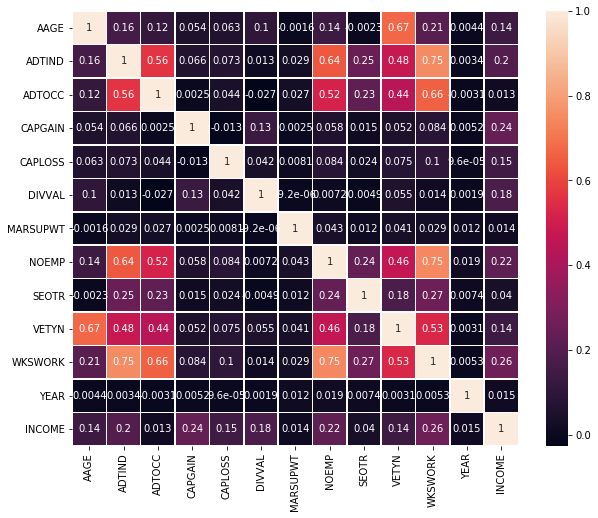

In [55]:
#Correlation coefficients are used in statistics to measure how strong a relationship is between two variables

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df1.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidth=0.5)

### Pie chart showing income distribution

([<matplotlib.patches.Wedge at 0x1a78570c4a8>,
 [Text(-0.21310116182984737, -1.0791607363255806, 'income<=50k'),
  Text(0.25184691717378493, 1.2753717616091635, 'income>50k')],
 [Text(-0.1162369973617349, -0.5886331289048621, '93.79'),
  Text(0.15498271826079071, 0.7848441609902544, '6.21')])

(-1.107920158213057, 1.1071409934768, -1.1163710290790505, 1.3063339959297728)

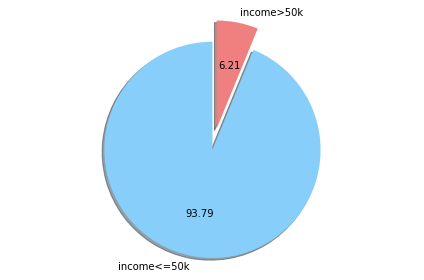

In [56]:
m = 0
l = 0
for i in new_df1.INCOME:
    if i == 0:
        l += 1
    if i == 1:
        m += 1

#Set up pie chart
colors = ['lightskyblue', 'lightcoral']
values = [l, m] 
labels = ['income<=50k', 'income>50k'] 
explode = (0, 0.2)
plt.pie(values, labels=labels,explode=explode, colors=colors, shadow=True, startangle=90, autopct='%.2f')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [58]:
census_counts = new_df1['AHGA'].value_counts()
census_counts[:20]

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: AHGA, dtype: int64

### Distribution of Population across various education levels

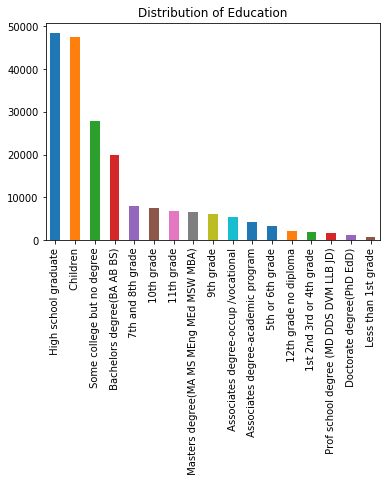

In [60]:
new_df1['AHGA'].value_counts().plot.bar(title="Distribution of Education")

### Frequency distribution based on marital status

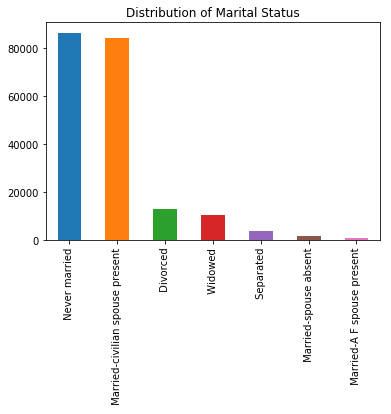

In [61]:
new_df1['AMARITL'].value_counts().plot.bar(title="Distribution of Marital Status")

### Barplot displaying count of population across race

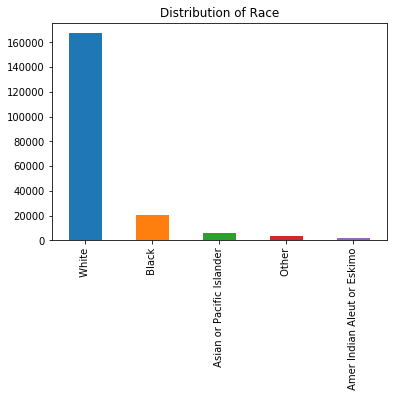

In [62]:
new_df1['ARACE'].value_counts().plot.bar(title="Distribution of Race")

### Frequency distribution of gender

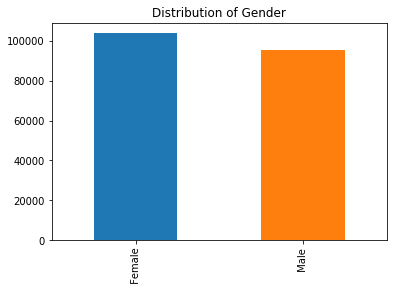

In [63]:
new_df1['ASEX'].value_counts().plot.bar(title="Distribution of Gender")

### Frequency distribution of Income

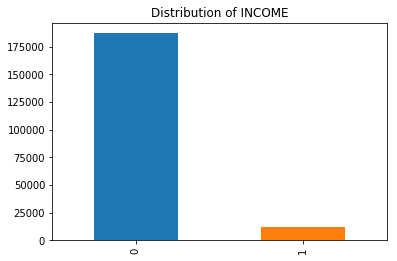

In [64]:
new_df1['INCOME'].value_counts().plot.bar(title="Distribution of INCOME")

### Frequency distribution of age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A785AD60F0>]],
      dtype=object)

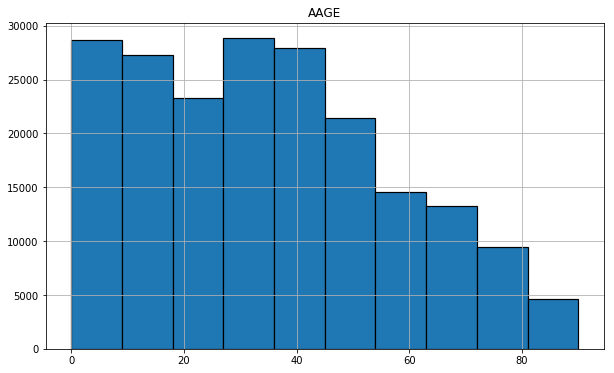

In [65]:
new_df1.hist(column = 'AAGE' ,edgecolor='black', linewidth=1.2, figsize = (10,6))

### Box plot showing distribution of age

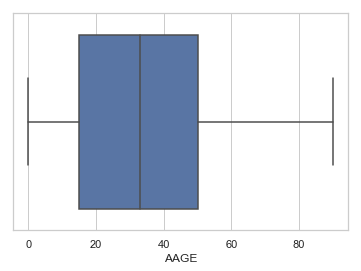

In [66]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=new_df1["AAGE"])

### Density Plot and Histogram of age

C:\Users\suraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


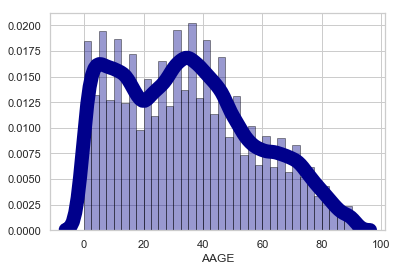

In [67]:
sns.distplot(new_df1['AAGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 14})

In [68]:
newdf_rel = new_df1[['WKSWORK','ARACE','AAGE']]
newdf_rel.head()

WKSWORK                       ARACE  AAGE
0        0                       White    73
1       52                       White    58
2        0   Asian or Pacific Islander    18
3        0                       White     9
4        0                       White    10

### Pair Plot between Weeks worked per year & Age

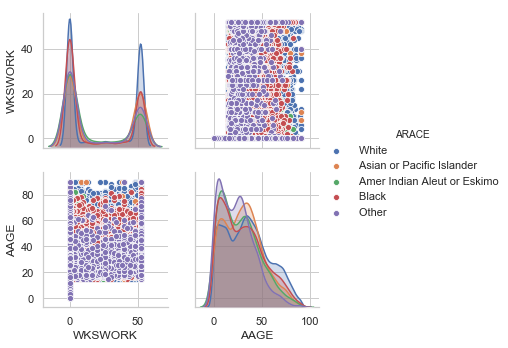

In [69]:
sns.pairplot(newdf_rel, hue='ARACE')

### Stacked bar to show Income values based on SEX and RACE

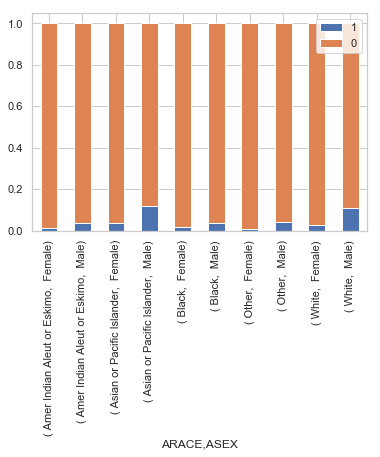

In [70]:
#stacked bar to show Income values between SEX and RACE
df_g = new_df1.groupby(['ARACE', 'ASEX'])['INCOME'].agg([np.mean, lambda x: 1-np.mean(x)])
df_g.columns = ['1', '0']
df_g.plot.bar(stacked=True)

### Strip plot showing density of income across different age groups based on gender

Text(0.5, 1.0, 'Income controlled by Age and Gender')

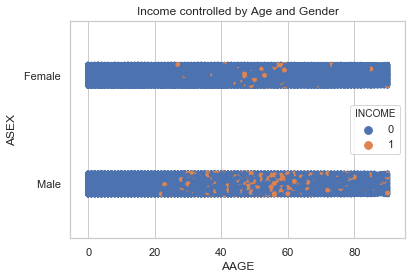

In [72]:
ax = sns.stripplot(x='AAGE', y='ASEX', data=new_df1,hue='INCOME')
ax.set_title('Income controlled by Age and Gender')

### Gender distribution based on education levels

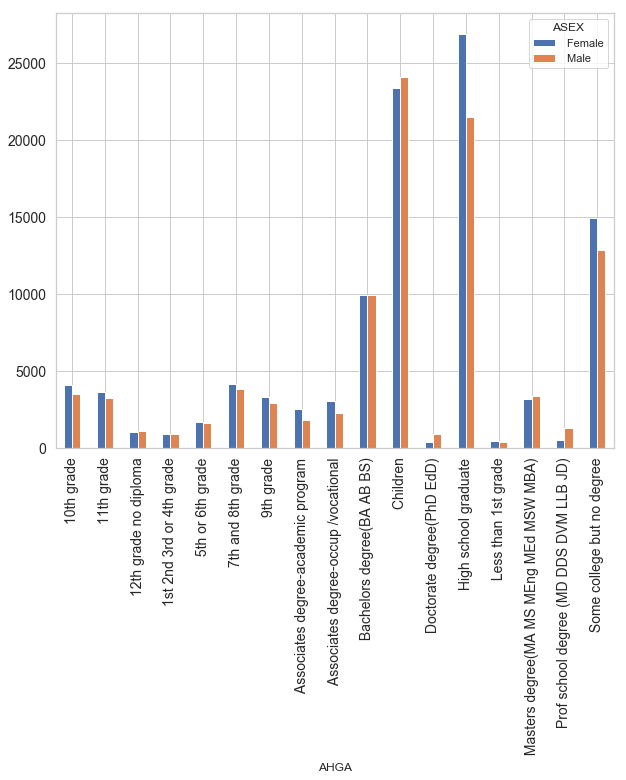

In [73]:
new_df1.groupby(["AHGA","ASEX"]).size().unstack("ASEX").plot(kind="bar",fontsize=14,figsize=(10, 8))

### Income distribution across gender

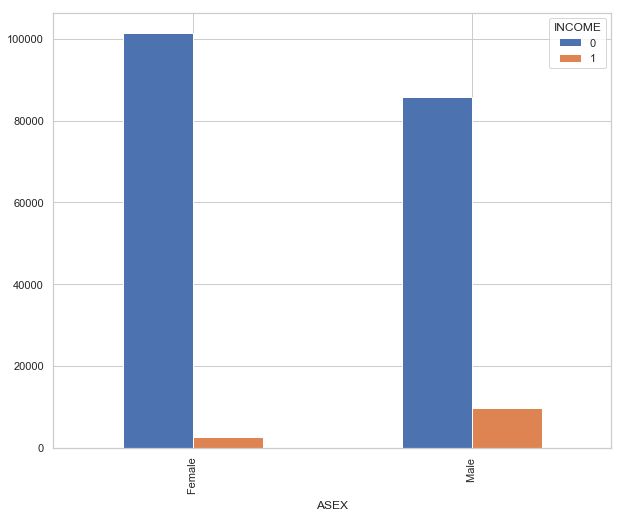

In [74]:
new_df1.groupby(['INCOME','ASEX']).size().unstack('INCOME').plot(kind="bar",figsize=(10, 8))

# Checking Accuracy of Data using Machine Learning Models

In [17]:
X=new_df[features]
Y=new_df[target]

In [18]:
X.head(5)

ADTIND  ADTOCC  CAPGAIN  CAPLOSS  DIVVAL  MARSUPWT  NOEMP  SEOTR  VETYN  \
0       0       0        0        0       0   1700.09      0      0      2   
1       4      34        0        0       0   1053.55      1      0      2   
2       0       0        0        0       0    991.95      0      0      2   
3       0       0        0        0       0   1758.14      0      0      0   
4       0       0        0        0       0   1069.16      0      0      0   

   WKSWORK  YEAR  AAGE_0  AAGE_1  AAGE_2  AAGE_3  AAGE_4  AAGE_5  AAGE_6  \
0        0    95       0       0       0       0       0       0       0   
1       52    94       0       0       0       0       0       0       0   
2        0    95       0       0       0       0       0       0       0   
3        0    94       0       0       0       0       0       0       0   
4        0    94       0       0       0       0       0       0       0   

   AAGE_7  AAGE_8  AAGE_9  AAGE_10  AAGE_11  AAGE_12  AAGE_13  AAGE_14  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        0        0        0        0   
2       0       0       0        0        0        0        0        0   
3       0       0       1        0        0        0        0        0   
4       0       0       0        1        0        0        0        0   

   AAGE_15  AAGE_16  AAGE_17  AAGE_18  AAGE_19  AAGE_20  AAGE_21  AAGE_22  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        1        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   AAGE_23  AAGE_24  AAGE_25  AAGE_26  AAGE_27  AAGE_28  AAGE_29  AAGE_30  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   AAGE_31  AAGE_32  AAGE_33  AAGE_34  AAGE_35  AAGE_36  AAGE_37  AAGE_38  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   AAGE_39  AAGE_40  AAGE_41  AAGE_42  AAGE_43  AAGE_44  AAGE_45  AAGE_46  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   AAGE_47  AAGE_48  AAGE_49  AAGE_50  AAGE_51  AAGE_52  AAGE_53  AAGE_54  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   AAGE_55  AAGE_56  AAGE_57  AAGE_58  AAGE_59  AAGE_60  AAGE_61  AAGE_62  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        1        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        

In [19]:
Y.head(5)

INCOME
0       0
1       0
2       0
3       0
4       0

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split( X, Y, test_size=0.33,random_state=23)

In [23]:
X_train.shape
X_test.shape

(133680, 462)

(65843, 462)

## Logistic Regression

In [24]:
regressor=LogisticRegression()

In [25]:
regressor.fit(X_train, Y_train.values.ravel())

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
regressor.coef_

array([[-9.71108141e-03, -4.57582910e-02,  1.01035356e-04,
         6.07210841e-04,  1.82552811e-04,  4.57498648e-05,
         1.70106247e-01, -2.52214041e-02,  2.80561999e-01,
         3.29477334e-02, -6.65162090e-02, -2.09846921e-02,
        -2.42319631e-02, -2.52490582e-02, -2.56888471e-02,
        -2.50268131e-02, -2.51979232e-02, -2.39800156e-02,
        -2.48485546e-02, -2.50022045e-02, -2.45742283e-02,
        -2.36880827e-02, -2.44813890e-02, -2.31769873e-02,
        -2.43385899e-02, -2.30433183e-02, -5.99760878e-02,
        -2.10889348e-02, -7.98291471e-02, -1.57551589e-01,
        -1.36854004e-01, -1.30766602e-01, -3.48076583e-01,
        -2.89153011e-01, -7.45618085e-01, -7.99076444e-01,
        -8.67106474e-01, -9.10805978e-01, -9.39920515e-01,
        -6.89167554e-01, -7.63524322e-01, -4.30242302e-01,
        -2.37007770e-01, -2.78562817e-01, -2.19536748e-01,
        -4.99777685e-02,  3.40998716e-02,  5.41921926e-03,
         1.56446375e-01,  1.35901048e-01,  3.40678524e-0

In [27]:
regressor.coef_.shape

(1, 462)

In [28]:
regressor.intercept_

array([0.00182915])

In [29]:
y_pred_logistic_test = regressor.predict(X_test)

In [30]:
y_pred_logistic_train = regressor.predict(X_train)

In [31]:
print("Logistic regression accuracy for training data:",accuracy_score(Y_train, y_pred_logistic_train))

Logistic regression accuracy for training data: 0.952939856373429


In [32]:
print("Logistic regression accuracy for testing data:",accuracy_score(Y_test, y_pred_logistic_test))

Logistic regression accuracy for testing data: 0.9518399829898395


In [33]:
pd.DataFrame(
    confusion_matrix(Y_test, y_pred_logistic_test),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

Predicted Income not>50k  Predicted Income>50k
True Income not>50k                     61081                   658
True Income>50k                          2513                  1591

In [34]:
resid = np.array([i[0] for i in Y_train.values.tolist()]) - np.array(y_pred_logistic_train.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of regression model:",AIC)
print("BIC of regression model:",BIC)

AIC of regression model: 906.5062493608599
BIC of regression model: -149483.54010942433


In [35]:
resid = np.array([i[0] for i in Y_test.values.tolist()]) - np.array(y_pred_logistic_test.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of regression model:",AIC)
print("BIC of regression model:",BIC)

AIC of regression model: 907.8763954509233
BIC of regression model: -194590.80461344542


In [ ]:
# Recursive Elimination
m = RFECV(LogisticRegression(), scoring = "accuracy")

m.fit(X_train,Y_train)

In [ ]:
print(len(m.transform(X_train)[0]))

In [ ]:
y_predict_RFECV = m.predict(X_test)

In [ ]:
pd.DataFrame(
    confusion_matrix(Y_test, y_predict_RFECV),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

In [37]:
print(classification_report(Y_test,y_pred_logistic_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     61739
           1       0.71      0.39      0.50      4104

   micro avg       0.95      0.95      0.95     65843
   macro avg       0.83      0.69      0.74     65843
weighted avg       0.94      0.95      0.95     65843



## KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [39]:
#accuracy of knn
print("KNN accuracy for training data:",accuracy_score(Y_train, y_pred_knn_train))

KNN accuracy for training data: 0.9536729503291442


In [40]:
print("KNN accuracy for testing data:",accuracy_score(Y_test, y_pred_knn_test))

KNN accuracy for testing data: 0.9397658065397992


In [41]:
pd.DataFrame(
    confusion_matrix(Y_test, y_pred_knn_test),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

Predicted Income not>50k  Predicted Income>50k
True Income not>50k                     60781                   958
True Income>50k                          3008                  1096

In [42]:
resid = np.array([i[0] for i in Y_train.values.tolist()]) - np.array(y_pred_knn_train.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of KNN model:",AIC)
print("BIC of KNN model:",BIC)

AIC of KNN model: 906.5376501981239
BIC of KNN model: -150517.30277340903


In [43]:
resid = np.array([i[0] for i in Y_test.values.tolist()]) - np.array(y_pred_knn_test.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of KNN model:",AIC)
print("BIC of KNN model:",BIC)

AIC of KNN model: 907.4289733818405
BIC of KNN model: -179860.9989661364


## LDA

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)  

X_train1 = lda.fit_transform(X_train, Y_train)  
X_test1 = lda.transform(X_test)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [45]:
y_pred_lda_train = lda.predict(X_train)
y_pred_lda_test = lda.predict(X_test)

In [46]:
#accuracy of lda
print("LDA accuracy for training data:",accuracy_score(Y_train, y_pred_lda_train))

LDA accuracy for training data: 0.9448234590065829


In [47]:
print("LDA accuracy for testing data:",accuracy_score(Y_test, y_pred_lda_test))

LDA accuracy for testing data: 0.9443524748264812


In [48]:
pd.DataFrame(
    confusion_matrix(Y_test, y_pred_lda_test),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

Predicted Income not>50k  Predicted Income>50k
True Income not>50k                     60052                  1687
True Income>50k                          1977                  2127

In [49]:
resid = np.array([i[0] for i in Y_train.values.tolist()]) - np.array(y_pred_lda_train.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of LDA model:",AIC)
print("BIC of LDA model:",BIC)

AIC of LDA model: 906.1880264695271
BIC of LDA model: -139007.16519241157


In [50]:
resid = np.array([i[0] for i in Y_test.values.tolist()]) - np.array(y_pred_lda_test.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of LDA model:",AIC)
print("BIC of LDA model:",BIC)

AIC of LDA model: 907.587378548412
BIC of LDA model: -185075.93465741808


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)

rfc.fit(X_train1, Y_train)
y_pred_rfc_train = rfc.predict(X_train1)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
y_pred_rfc_train = rfc.predict(X_train1)
y_pred_rfc_test = rfc.predict(X_test1)

In [53]:
#accuracy of RFC
print("RFC accuracy for training data:",accuracy_score(Y_train, y_pred_rfc_train))

RFC accuracy for training data: 0.9499925194494315


In [54]:
print("RFC accuracy for testing data:",accuracy_score(Y_test, y_pred_rfc_test))

RFC accuracy for testing data: 0.9490758319031636


In [55]:
pd.DataFrame(
    confusion_matrix(Y_test, y_pred_rfc_test),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

Predicted Income not>50k  Predicted Income>50k
True Income not>50k                     61191                   548
True Income>50k                          2805                  1299

In [56]:
resid = np.array([i[0] for i in Y_train.values.tolist()]) - np.array(y_pred_rfc_train.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of random forest model:",AIC)
print("BIC of random forest model:",BIC)

AIC of random forest model: 906.384757020928
BIC of random forest model: -145483.83004035207


In [57]:
resid = np.array([i[0] for i in Y_test.values.tolist()]) - np.array(y_pred_rfc_test.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of random forest model:",AIC)
print("BIC of random forest model:",BIC)

AIC of random forest model: 907.7647785070675
BIC of random forest model: -190916.2073962979


## Decision Trees

In [21]:
from sklearn.tree import DecisionTreeRegressor
# create a regressor object 
dtr = DecisionTreeRegressor(random_state = 0)  

# fit the regressor with X and Y data 
dtr.fit(X_train,Y_train)

y_pred_dtr_train = dtr.predict(X_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [22]:
y_pred_dtr_train = dtr.predict(X_train)
y_pred_dtr_test = dtr.predict(X_test)

In [26]:
print("Decision Tree accuracy for training data:",accuracy_score(Y_train, y_pred_dtr_train.round()))

Decision Tree accuracy for training data: 0.9999925194494315


In [27]:
print("Decision Tree accuracy for training data:",accuracy_score(Y_train.round(), y_pred_dtr_train.round()))

Decision Tree accuracy for training data: 0.9999925194494315


In [61]:
print("Decision Tree accuracy for testing data:",accuracy_score(Y_test, y_pred_dtr_test))

Decision Tree accuracy for testing data: 0.9318530443631062


In [63]:
pd.DataFrame(
    confusion_matrix(Y_test, y_pred_dtr_test),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

Predicted Income not>50k  Predicted Income>50k
True Income not>50k                     59462                  2277
True Income>50k                          2210                  1894

In [64]:
resid = np.array([i[0] for i in Y_train.values.tolist()]) - np.array(y_pred_dtr_train.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of decision tree model:",AIC)
print("BIC of decision tree model:",BIC)

AIC of decision tree model: 925.3862943611199
BIC of decision tree model: -771042.9415854823


In [65]:
resid = np.array([i[0] for i in Y_test.values.tolist()]) - np.array(y_pred_dtr_test.tolist())
sse = sum(resid**2)
k = 462
n = 65843

AIC = (2*k) - (2*np.log(sse))
BIC = (n*np.log(sse/n)) + (k*np.log(n))

print("AIC of decision tree model:",AIC)
print("BIC of decision tree model:",BIC)

AIC of decision tree model: 907.182120788048
BIC of decision tree model: -171734.24129959714
